In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
from tqdm import tqdm

import sys
sys.path.append('../functions')
import hexbin_functions as hexfunc

import flock_measures as flock

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/h3/unstable/__init__.py:4: UserWarning: Modules under `h3.unstable` are experimental, and may change at any time.
  warnings.warn(


In [2]:
location = 'Cape_Hatteras'
member = 6
std = 0.1

file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/spatial/dr_{std*100:03.0f}/{location}_dr{std*100:03.0f}_m{member:03d}.zarr"
pset = xr.open_zarr(file_path)

In [3]:
lons = pset['lon'][:, :].values
lats = pset['lat'][:, :].values

CM_lons, CM_lats = flock.center_of_mass_displacement(pset['lon'], pset['lat'])
CM_lons += np.mean(lons[:,0])
CM_lats += np.mean(lats[:,0])

sigma_lons, sigma_lats = flock.center_of_mass_spread(lons, lats)

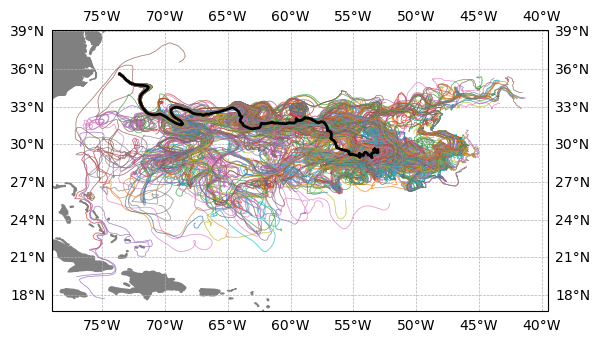

In [4]:
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
# ax.set_extent([-78, -70, 33, 40], crs=cartopy.crs.PlateCarree())
# ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=0, color='gray')
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

for i in range(1000):
    ax.plot(lons[i,:], lats[i,:], lw=0.5, alpha=0.5);

ax.plot(CM_lons, CM_lats, 'k', lw=2)

In [5]:
D, D_mean, D_std = flock.relative_dispersion(lons, lats, CM_lons, CM_lats)

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/osgeo/osr.py:410: FutureWarning: Neither osr.UseExceptions() nor osr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Text(0, 0.5, 'Mean Displacement from Center of Mass [km]')

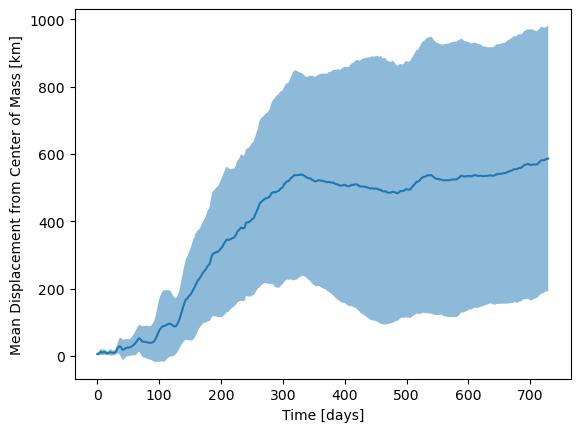

In [6]:
plt.plot(D_mean/1000)
plt.fill_between(np.arange(len(D_mean)), (D_mean-D_std)/1000, (D_mean+D_std)/1000, alpha=0.5)
plt.xlabel('Time [days]')
plt.ylabel('Mean Displacement from Center of Mass [km]')


In [11]:
location = 'Cape_Hatteras'
N_members = 50
N_obs = len(pset.obs)
D_means = np.zeros((N_members, N_obs))
D_stds = np.zeros_like(D_means)
CM_lons = np.zeros_like(D_means)
CM_lats = np.zeros_like(D_means)
delta_r = 0.1

for member in tqdm(range(1,N_members+1)):
    print(f"Member {member}")

    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/spatial/dr_{delta_r*100:03.0f}/{location}_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    pset = xr.open_zarr(file_path)
    
    lons = pset['lon'][:, :].values
    lats = pset['lat'][:, :].values
    
    CM_x, CM_y = flock.center_of_mass_displacement(lons, lats)
    CM_x += np.mean(lons[:, 0])
    CM_y += np.mean(lats[:, 0])
    
    CM_lons[member-1,:] = CM_x
    CM_lats[member-1,:] = CM_y
    
    _, _D_mean, _D_std = flock.relative_dispersion(lons, lats, CM_x, CM_y)
    
    D_means[member-1,:] = _D_mean
    D_stds[member-1,:] = _D_std
    
D_means = D_means/1000
D_stds = D_stds/1000

Member 1
Member 2
Member 3
Member 4
Member 5
Member 6
Member 7
Member 8
Member 9
Member 10
Member 11
Member 12
Member 13
Member 14
Member 15
Member 16
Member 17
Member 18
Member 19
Member 20
Member 21
Member 22
Member 23
Member 24
Member 25
Member 26
Member 27
Member 28
Member 29
Member 30
Member 31
Member 32
Member 33
Member 34
Member 35
Member 36
Member 37
Member 38
Member 39
Member 40
Member 41
Member 42
Member 43
Member 44
Member 45
Member 46
Member 47
Member 48
Member 49
Member 50


Text(0.5, 1.0, 'Center of Mass Displacement $\\delta r = 0.1$')

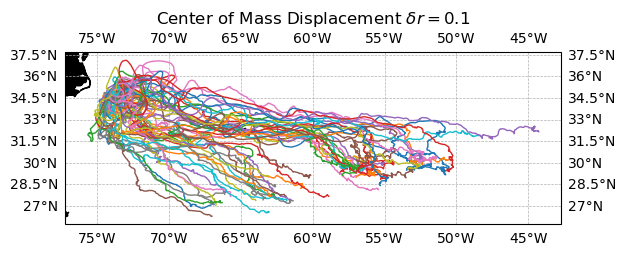

In [13]:
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
# ax.set_extent([-85, -10, 13, 40], crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=0, color='black')
# ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

for i in range(N_members):
    ax.plot(CM_lons[i,:], CM_lats[i,:], lw=1)
    
plt.title(f"Center of Mass Displacement $\\delta r = {delta_r}$")


Text(0.5, 1.0, 'Relative Dispersion $\\delta r = 0.1$')

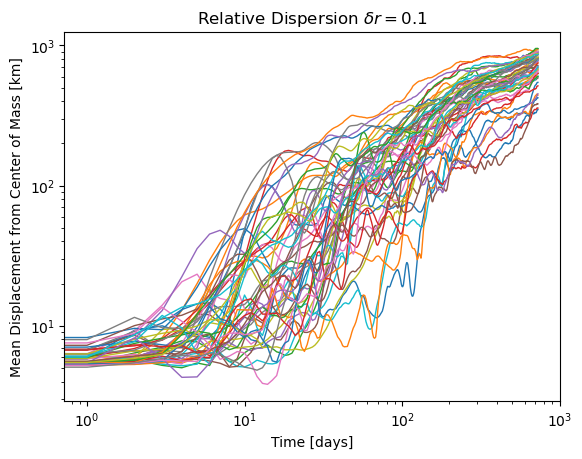

In [16]:
for i in range(N_members):
    plt.loglog(D_means[i,:], lw=1)

    # plt.fill_between(np.arange(N_obs), D_means[i,:]-D_stds[i,:], D_means[i,:]+D_stds[i,:], alpha=0.1)
    
plt.xlabel('Time [days]')
plt.ylabel('Mean Displacement from Center of Mass [km]')
plt.title(f"Relative Dispersion $\\delta r = {delta_r}$")

Text(0.5, 1.0, 'Center of Mass Displacement Spread $\\delta r = 0.1$')

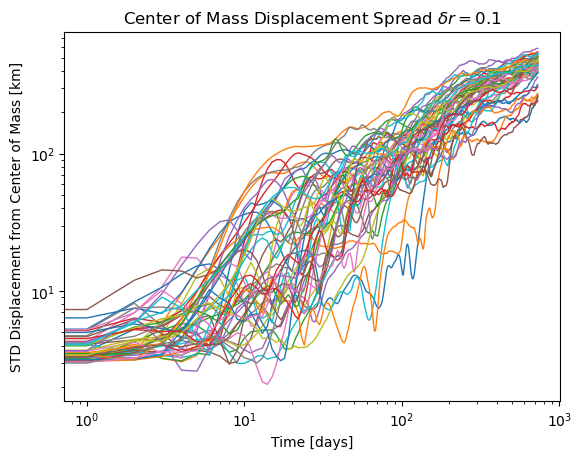

In [17]:

for i in range(N_members):
    plt.loglog(D_stds[i,:], lw=1)

    # plt.fill_between(np.arange(N_obs), D_means[i,:]-D_stds[i,:], D_means[i,:]+D_stds[i,:], alpha=0.1)
    
plt.xlabel('Time [days]')
plt.ylabel('STD Displacement from Center of Mass [km]')
plt.title(f"Center of Mass Displacement Spread $\\delta r = {delta_r}$")

In [116]:
location = 'Cape_Hatteras'
N_members = 7
N_obs = len(pset.obs)
D_means = np.zeros((N_members, N_obs))
D_stds = np.zeros_like(D_means)
CM_lons = np.zeros_like(D_means)
CM_lats = np.zeros_like(D_means)
delta_r = 1.

for member in range(1,N_members+1):
    print(f"Member {member}")

    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/spatial/dr_{delta_r*100:03.0f}/{location}_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    pset = xr.open_zarr(file_path)
    
    lons = pset['lon'][:, :].values
    lats = pset['lat'][:, :].values
    
    CM_x, CM_y = flock.center_of_mass_displacement(lons, lats)
    CM_x += np.mean(lons[:, 0])
    CM_y += np.mean(lats[:, 0])
    
    CM_lons[member-1,:] = CM_x
    CM_lats[member-1,:] = CM_y
    
    _, _D_mean, _D_std = flock.relative_dispersion(lons, lats, CM_x, CM_y)
    
    D_means[member-1,:] = _D_mean
    D_stds[member-1,:] = _D_std
    
D_means = D_means/1000
D_stds = D_stds/1000

Member 1
Member 2
Member 3
Member 4
Member 5
Member 6
Member 7


Text(0.5, 1.0, 'Center of Mass Displacement $\\delta r = 1.0$')

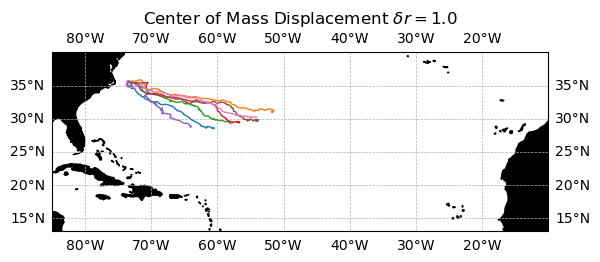

In [117]:
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-85, -10, 13, 40], crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=0, color='black')
# ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

for i in range(7):
    ax.plot(CM_lons[i,:], CM_lats[i,:], lw=1)
    
plt.title(f"Center of Mass Displacement $\\delta r = {delta_r}$")


Text(0.5, 1.0, 'Mean Displacement from Center of Mass $\\delta r = 1.0$')

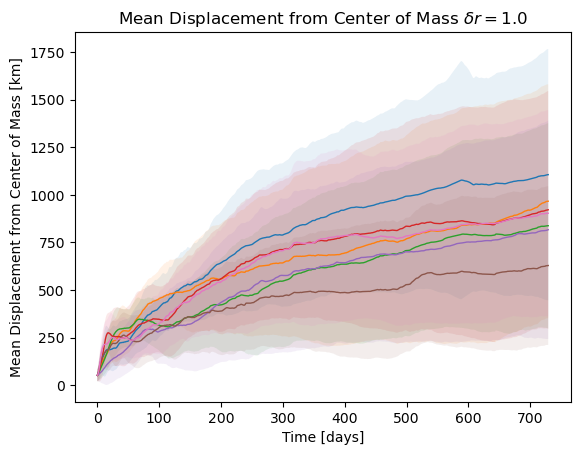

In [120]:
for i in range(7):
    plt.plot(D_means[i,:], lw=1)

    plt.fill_between(np.arange(N_obs), D_means[i,:]-D_stds[i,:], D_means[i,:]+D_stds[i,:], alpha=0.1)
    
plt.xlabel('Time [days]')
plt.ylabel('Mean Displacement from Center of Mass [km]')
plt.title(f"Mean Displacement from Center of Mass $\\delta r = {delta_r}$")

Text(0.5, 1.0, 'STD Displacement from Center of Mass $\\delta r = 1.0$')

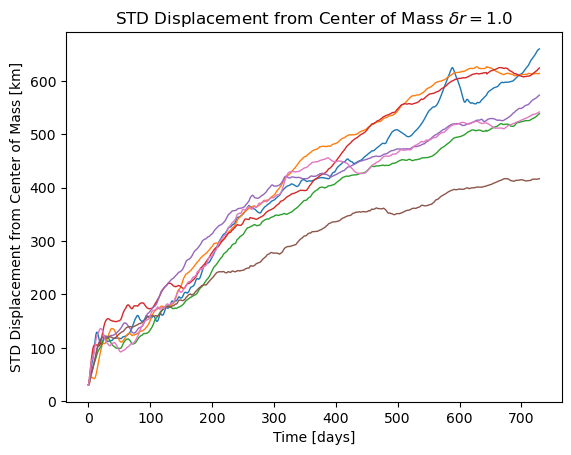

In [121]:

for i in range(7):
    plt.plot(D_stds[i,:], lw=1)

    # plt.fill_between(np.arange(N_obs), D_means[i,:]-D_stds[i,:], D_means[i,:]+D_stds[i,:], alpha=0.1)
    
plt.xlabel('Time [days]')
plt.ylabel('STD Displacement from Center of Mass [km]')
plt.title(f"STD Displacement from Center of Mass $\\delta r = {delta_r}$")